In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [2]:
X, y = make_moons(n_samples = 200, noise = 0.2)

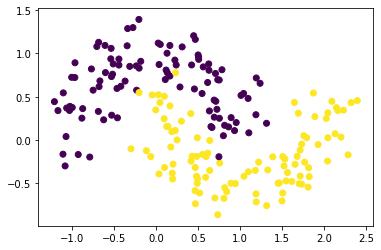

In [3]:
plt.scatter(*X.T, c = y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [49]:
lin_svm1 = Pipeline([
    ('ploy_feat', PolynomialFeatures(degree = 3)),
    ('std_scaler', StandardScaler()),
    ('lin_svm', LinearSVC(C = 5, loss = 'hinge', max_iter = 1000))
])

lin_svm1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ploy_feat',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_svm',
                 LinearSVC(C=5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [50]:
lin_svm2 = Pipeline([
    ('poly_feat', PolynomialFeatures(degree = 5)),
    ('std_scaler', StandardScaler()),
    ('lin_svm', LinearSVC(C = 5, loss = 'hinge', max_iter = 3000))
])

lin_svm2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly_feat',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_svm',
                 LinearSVC(C=5, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=3000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [51]:
lin_svm3 = Pipeline([
    ('poly_feat', PolynomialFeatures(degree = 3)),
    ('std_scaler', StandardScaler()),
    ('lin_svm', LinearSVC(C = 30, loss = 'hinge', max_iter = 20000))
])

lin_svm3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly_feat',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_svm',
                 LinearSVC(C=30, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=20000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [61]:
lin_svm4 = Pipeline([
    ('poly_feat', PolynomialFeatures(degree = 5)),
    ('std_scaler', StandardScaler()),
    ('lin_svm', LinearSVC(C = 30, loss = 'hinge', max_iter = 3000))
])

lin_svm4.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('poly_feat',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lin_svm',
                 LinearSVC(C=30, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=3000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [62]:
x1_min, x1_max = X_train[:, 0].min(), X_train[:, 0].max()
x2_min, x2_max = X_train[:, 1].min(), X_train[:, 1].max()

x1, x2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 100),
    np.linspace(x2_min, x2_max, 100)
)

X_new = np.c_[x1.ravel(), x2.ravel()]

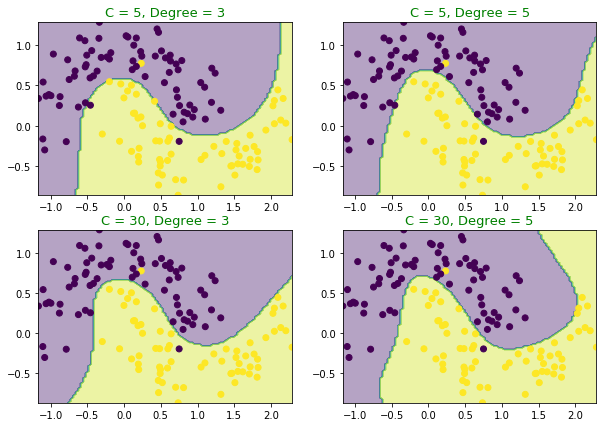

In [69]:
estimators = [lin_svm1, lin_svm2, lin_svm3, lin_svm4]

plt.figure(figsize = (10, 7))

for i in range(4):
    y_pred = estimators[i].predict(X_new).reshape(x1.shape)
    plt.subplot(2, 2, i+1)
    if i == 0:
        plt.title('C = 5, Degree = 3', fontsize = 13, color = 'green')
    elif i == 1:
        plt.title('C = 5, Degree = 5', fontsize = 13, color = 'green')
    elif i == 2:
        plt.title('C = 30, Degree = 3', fontsize = 13, color = 'green')
    else:
        plt.title('C = 30, Degree = 5', fontsize = 13, color = 'green')
    plt.contourf(x1, x2, y_pred, alpha = 0.4)
    plt.scatter(*X_train.T, c = y_train)
    plt.axis([x1_min, x1_max, x2_min, x2_max])
plt.show()

In [70]:
from sklearn.svm import SVC

In [71]:
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
y_pred = svc_clf.predict(X_new).reshape(x1.shape)

[-1.164618390239145,
 2.2859423091466735,
 -0.8684033344868469,
 1.287973556435409]

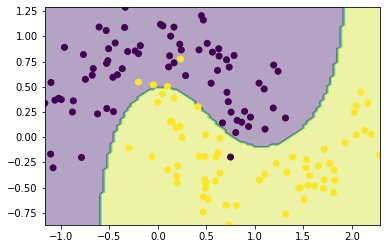

In [78]:
plt.contourf(x1, x2, y_pred, alpha = 0.4)
plt.scatter(*X_train.T, c = y_train)
plt.axis([x1_min, x1_max, x2_min, x2_max])

In [120]:
svc_clf = SVC(kernel = 'poly', degree = 3, C = 5)
svc_clf.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [121]:
y_pred = svc_clf.predict(X_new).reshape(x1.shape)

[-1.164618390239145,
 2.2859423091466735,
 -0.8684033344868469,
 1.287973556435409]

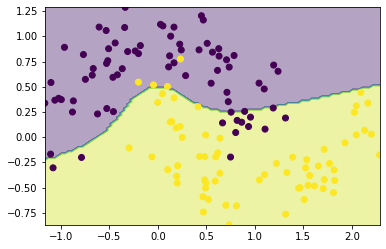

In [122]:
plt.contourf(x1, x2, y_pred, alpha = 0.4)
plt.scatter(*X_train.T, c = y_train)
plt.axis([x1_min, x1_max, x2_min, x2_max])